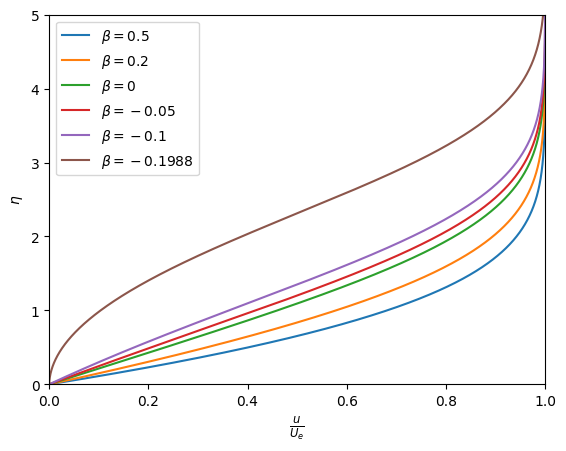

--- 1.3851518630981445 seconds --- Faster than MatLab


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tabulate import tabulate
import time

start_time = time.time()
table_1, theta_over_g_x, c_f_Re_theta = [], [], []
beta_list, eta = [0.5, 0.2, 0, -0.05, -0.1, -0.1988], np.linspace(0, 100, int(100 / 0.001))

falkner_skan_differential_equation = lambda eta, f, beta: [f[1], f[2], -f[0] * f[2] - beta * (1 - f[1] ** 2)]
secant = lambda x0, x1, f_1, f_0: x1 - (1 - f_1) * (x1 - x0) / ((1 - f_1) - (1 - f_0))
solve_falkner_skan_eqaution = lambda beta, guess: solve_ivp(falkner_skan_differential_equation, t_span=(0, 100), y0=[0, 0, guess], args=(beta,), t_eval=eta, method='BDF').y

for beta in beta_list:
    guess_1, guess_2 = 1, 0.1
    f_0 = solve_falkner_skan_eqaution(beta, guess_1)
    while abs(guess_2 - guess_1) > 1E-8:
        f_1 = solve_falkner_skan_eqaution(beta, guess_2)
        guess_1, guess_2, f_0 = guess_2, secant(guess_1, guess_2, f_1[1][-1], f_0[1][-1]), f_1
    plt.plot(f_1[1][:5001], eta[:5001], label=r"$\beta={}$".format(beta))
    theta_over_g_x = f_0[2][0] / (1 + beta) - beta / (1 + beta) * (100 - f_0[0][-1])
    c_f_Re_theta = (2 * f_0[2][0] * theta_over_g_x)
    H = theta_over_g_x**(-1) * (eta[-1] - f_0[0][-1])
    table_1.append([beta, theta_over_g_x, c_f_Re_theta, H])

plt.xlabel(r"$\frac{u}{U_e}$", fontsize="large"), plt.xlim(0, 1), plt.ylim(0, 5), plt.ylabel('$\eta$', fontsize="medium"), plt.legend(), plt.savefig('Project 2'), plt.show()
print("--- %s seconds --- Faster than MatLab" % (time.time() - start_time))

with open('Table_1.tex', 'w') as f:
    f.write(tabulate(table_1, headers=[r'$\beta$', r'$\frac{\theta}{g(x)}$', r'$c_f Re_{\theta}$', "$H$"], tablefmt='latex_raw'))


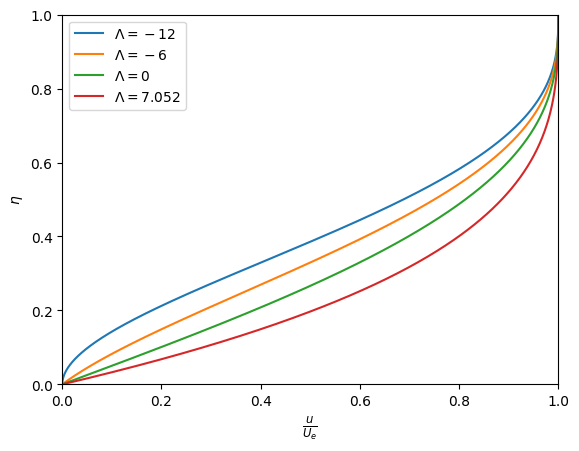

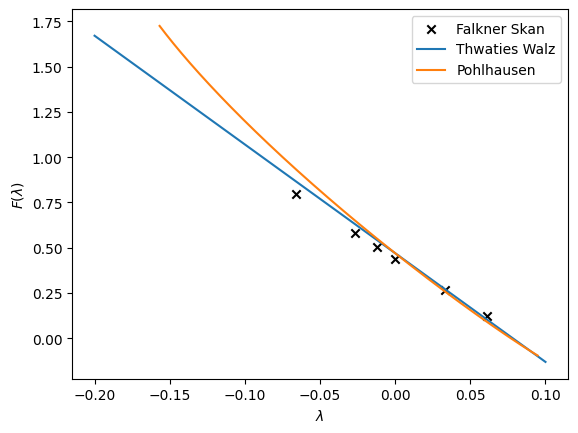

(Text(0.5, 25.0, '$\\lambda$'),
 Text(26.000000000000007, 0.5, '$F(\\lambda)$'),
 None,
 None)

In [53]:
capital_lambda = [-12, -6, 0, 7.052]
pohlhausen_profile = lambda capital_lambda, eta: 2*eta - 2*eta**3 + eta**4 + capital_lambda/6 * eta * (1-eta)**3
for i in capital_lambda:
    plt.plot(pohlhausen_profile(i, eta), eta, label=r"$\Lambda={}$".format(i))

plt.xlabel(r"$\frac{u}{U_e}$", fontsize="large"), plt.xlim(0, 1), plt.ylim(0, 1), plt.ylabel('$\eta$', fontsize="medium"), plt.legend(), plt.savefig('Pohlhausen'), plt.show()

lambda_range = np.linspace(-0.2, 0.1, 1000)
Thwaites_walz_profile = lambda lambda_value: 0.47 - 6*lambda_value

capital_lambda = np.linspace(-12, 12, 1000)
lambda_s = lambda capital_lambda: (37/315 - capital_lambda/945 - (capital_lambda**2)/9072)**2 * capital_lambda
H = lambda capital_lambda : (3/10 - capital_lambda/120) / (37/315 - capital_lambda/945 - (capital_lambda**2)/9072)

lambda_s = lambda_s(capital_lambda)
pohlhausen_profile = lambda capital_lambda: 2*(2+capital_lambda/6)*(37/315 - capital_lambda/945 - (capital_lambda**2)/9072) - 2*(2+H(capital_lambda)) * lambda_s

lambda_list, Falkner_skan_table = [], []
lambda_list = [beta_list[x]*((table_1[x][1])**2) for x in range(len(beta_list))]
Falkner_skan_table = [table_1[x][2]-2*(2+table_1[x][3])*lambda_list[x] for x in range(len(beta_list))]

plt.scatter(lambda_list, Falkner_skan_table, label=r"Falkner Skan", color='black', marker='x')
plt.plot(lambda_range, Thwaites_walz_profile(lambda_range), label=r"Thwaties Walz")
plt.plot(lambda_s, pohlhausen_profile(capital_lambda), label=r"Pohlhausen")
plt.xlabel("$\lambda$"), plt.ylabel("$F(\lambda)$"), plt.legend(), plt.savefig("Thwaites Walz"), plt.show()

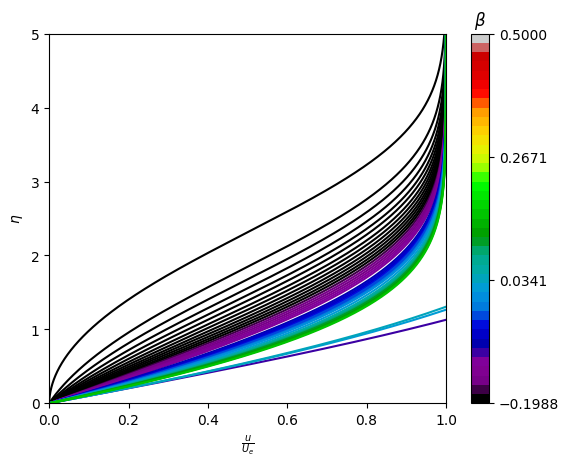

In [81]:
min_beta, max_beta, N = -0.1988, 0.5, 40
beta_list, eta = list(np.linspace(min_beta, max_beta, N)), np.linspace(0, 100, int(100/0.001))
cmap = plt.get_cmap('nipy_spectral', N)
fig, ax = plt.subplots()
for beta in beta_list:
    beta = np.round(beta, 4)
    guess_1, guess_2 = 1, 0.1
    f_0 = solve_falkner_skan_eqaution(beta, guess_1)
    while abs(guess_2 - guess_1) > 1E-8:
        f_1 = solve_falkner_skan_eqaution(beta, guess_2)
        guess_1, guess_2, f_0 = guess_2, secant(guess_1, guess_2, f_1[1][-1], f_0[1][-1]), f_1
    plot = ax.plot(f_1[1], eta, label=r"$\beta={}$".format(beta), c=cmap(beta))
plt.xlabel(r"$\frac{u}{U_e}$"), plt.xlim(0, 1), plt.ylim(0, 5), plt.ylabel('$\eta$')
import matplotlib as mpl 
# Normalizer 
norm = mpl.colors.Normalize(vmin=min_beta, vmax=max_beta) 
# creating ScalarMappable 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
sm.set_array([]) 
cbar = plt.colorbar(sm, ticks=np.linspace(min_beta, max_beta, int(N/10)), ax=ax)
cbar.ax.set_title(r"$\beta$")
plt.savefig('betazz'),
plt.show() 